# 1B. Mean Climate Driver

This notebook introduces new users to the PCDMI mean climate driver.

This notebook should be run in an environment with python, jupyterlab, pcmdi metrics package, and cdat installed. It is expected that you have downloaded the sample data as demonstrated in the [0. Prepare Demos](Demo_0_download_data.ipynb) notebook.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

The following cell reads in the choices you made during the download data step:

In [1]:
from user_choices import demo_data_directory, demo_output_directory

In [2]:
# To open and display one of the graphics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

import os

%matplotlib inline

## Basic use

The PCMDI Median Driver is driven via parameter files reflecting your study and environment. The parameter file for this demo is shown here:

In [3]:
with open("basic_param.py") as f:
    print(f.read())

import os

#
#  OPTIONS ARE SET BY USER IN THIS FILE AS INDICATED BELOW BY:
#
#

# RUN IDENTIFICATION
# DEFINES A SUBDIRECTORY TO METRICS OUTPUT RESULTS SO MULTIPLE CASES CAN
# BE COMPARED
case_id = 'basicTest'

# LIST OF MODEL VERSIONS TO BE TESTED - WHICH ARE EXPECTED TO BE PART OF
# CLIMATOLOGY FILENAME
test_data_set = ['ACCESS1-0', 'CanCM4']


# VARIABLES TO USE
vars = ['rlut']


# Observations to use at the moment "default" or "alternate"
reference_data_set = ['all']
#ext = '.nc'

# INTERPOLATION OPTIONS
target_grid = '2.5x2.5'  # OPTIONS: '2.5x2.5' or an actual cdms2 grid object
regrid_tool = 'regrid2'  # 'regrid2' # OPTIONS: 'regrid2','esmf'
# OPTIONS: 'linear','conservative', only if tool is esmf
regrid_method = 'linear'
regrid_tool_ocn = 'esmf'    # OPTIONS: "regrid2","esmf"
# OPTIONS: 'linear','conservative', only if tool is esmf
regrid_method_ocn = 'linear'

# Templates for climatology files
# %(param) will subsitute param with values in this file
filename_template = "cmip5.

To run the mean climate driver, use the following command in the terminal. This will generate a metrics file based on the models, observations, and other criteria in `basic_param.py`
```
mean_climate_driver.py -p basic_param.py
```  
In the next cell, bash cell magic is used to run this command as a subprocess:

In [4]:
%%bash
mean_climate_driver.py  -p basic_param.py

--- prepare mean climate metrics calculation ---
case_id: basicTest
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land':

2024-10-23 20:33:26,013 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:33:26,013 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.443886637144088
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1384446642039474
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.770267763900403
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.04383979899538 7.962870239960437
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9693832697582581
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metr

INFO::2024-10-23 20:34::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_basicTest.json
2024-10-23 20:34:07,541 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_basicTest.json
2024-10-23 20:34:07,541 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_basicTest.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:34:07,861 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:34:07,861 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.581863266319667
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 35.676970161763705
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.1635460184347601
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.33676419779921
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.611035481689909 9.540344002879925
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9518562007048922
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2024-10-23 20:34::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_basicTest.json
2024-10-23 20:34:47,633 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_basicTest.json
2024-10-23 20:34:47,633 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_basicTest.json


ref: default
ref_data_full_path: demo_data_tmp/obs4MIPs_PCMDI_clims/rlut/CERES-EBAF-4-1/v20210804/rlut_mon_CERES-EBAF-4-1_PCMDI_gn.200301-201812.AC.v20210804.nc
ref_data load_and_regrid failed: int() argument must be a string, a bytes-like object or a real number, not 'NoneType' 
Re-try with decode_times=False
'DataArray' object has no attribute 'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:34:49,269 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:34:49,269 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.441474434051779
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.42022623440726
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1365873707975822
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.76358422001215
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.032983607315776 7.9521691873316795
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9694779269200444
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
met

INFO::2024-10-23 20:35::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json
2024-10-23 20:35:25,542 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json
2024-10-23 20:35:25,542 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_basicTest.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:35:25,826 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:35:25,826 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.592931277171877
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.42022623440726
metrics, std_xyt
metrics, std_xyt: 35.676970161763705
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.165403311841126
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.339387410014902
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.609441449405928 9.538511418995654
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9518750636449926
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2024-10-23 20:36::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
2024-10-23 20:36:08,977 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
2024-10-23 20:36:08,977 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_basicTest.json
INFO::2024-10-23 20:36::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/basicTest/r

pmp mean clim driver completed


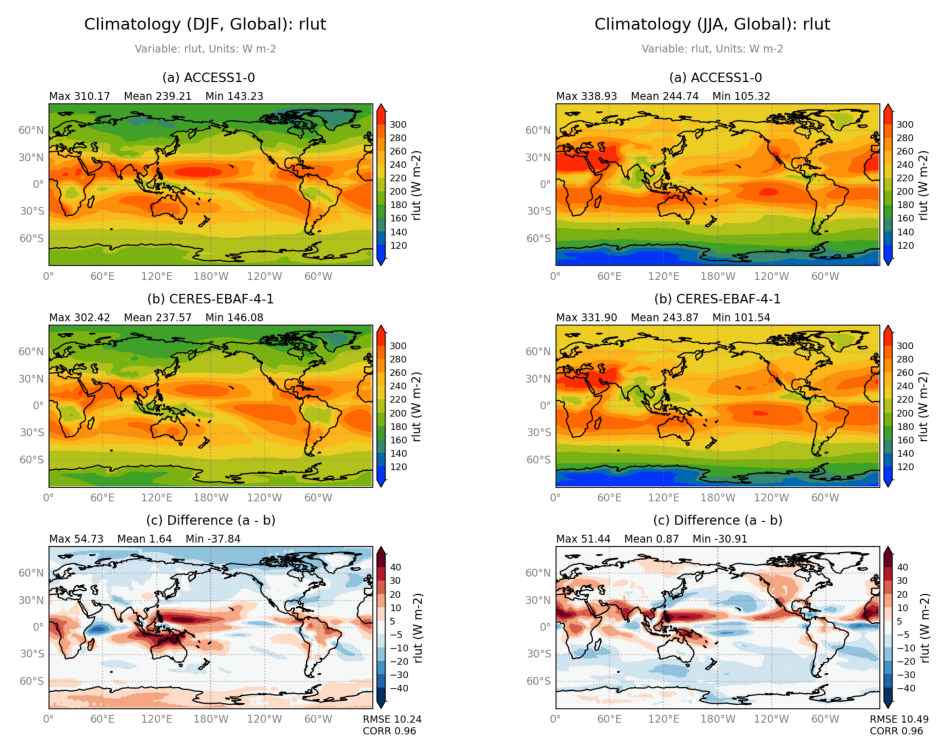

In [5]:
# figure size in inches optional
rcParams['figure.figsize'] = 12, 10

# path to images
image_path_djf = os.path.join(demo_output_directory,"basicTest/rlut/rlut_ACCESS1-0__interpolated_regrid2_Global_DJF_basicTest.png")
image_path_jja = os.path.join(demo_output_directory,"basicTest/rlut/rlut_ACCESS1-0__interpolated_regrid2_Global_JJA_basicTest.png")

# display images
fig, ax = plt.subplots(1,2); ax[0].axis('off'); ax[1].axis('off')
ax[0].imshow(mpimg.imread(image_path_djf))
ax[1].imshow(mpimg.imread(image_path_jja))

Running the mean climate driver produces an output json file in the demo output directory. The metrics are stored in the "RESULTS" object of the json, viewed here:

In [6]:
import json
import os
output_path = os.path.join(demo_output_directory,"basicTest/rlut_2.5x2.5_regrid2_metrics_basicTest.json")
with open(output_path) as f:
    metric = json.load(f)["RESULTS"]
print(json.dumps(metric, indent=2))

{
  "ACCESS1-0": {
    "alternate1": {
      "source": "CERES-EBAF-4-0",
      "": {
        "InputClimatologyFileName": "cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc",
        "Global": {
          "bias_xy": {
            "ann": "1.13844e+00",
            "djf": "1.67490e+00",
            "mam": "1.39179e+00",
            "jja": "8.59122e-01",
            "son": "6.29436e-01",
            "CalendarMonths": [
              "1.70942e+00",
              "1.20757e+00",
              "1.20022e+00",
              "1.35926e+00",
              "1.60580e+00",
              "1.28681e+00",
              "8.19685e-01",
              "4.69598e-01",
              "1.84053e-01",
              "3.97732e-01",
              "1.29905e+00",
              "2.12214e+00"
            ]
          },
          "cor_xy": {
            "ann": "9.69383e-01",
            "djf": "9.62127e-01",
            "mam": "9.50753e-01",
            "jja": "9.61062e-01",
            "son": "9.6270

## Customizing parameters in the mean climate driver

It is possible to override the parameter file from the command line. Use `mean_climate_driver.py --help` to see all the flag options.  
  
This next cell demonstrates how to change 'case_id' and 'regrid_tool' on the command line. Changing the 'case_id' is helpful because these results will be stored in a folder with that name, separate from other runs.  

Both the model data sets and observations are regridded to a 2.5 by 2.5 degree grid before producing statistics. Interpolation of the different grid is conducted by [creating a target grid](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.create_target_grid.html#pcmdi_metrics.utils.create_target_grid) and [regridding](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.regrid.html#pcmdi_metrics.utils.regrid) it.

The two regrid tools available are 'regrid2' and ['xesmf'](https://xesmf.readthedocs.io/en/latest/). 'regrid2' is recommended, but 'xesmf' must be used with non-rectangular grids. See [regrid](http://pcmdi.github.io/pcmdi_metrics/generated/pcmdi_metrics.utils.regrid.html#pcmdi_metrics.utils.regrid) function for more details.

In [7]:
# for conda
"""
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge xesmf
"""

'\nimport sys\n!conda install --yes --prefix {sys.prefix} -c conda-forge xesmf\n'

OR delete the triple quotations on lines 2&5 from this cell to install with pip:

In [8]:
# for pip
"""
import sys
!{sys.executable} -m pip install git+https://github.com/pangeo-data/xesmf.git
"""

'\nimport sys\n!{sys.executable} -m pip install git+https://github.com/pangeo-data/xesmf.git\n'

In [9]:
%%bash
mean_climate_driver.py  -p basic_param.py --case_id 'Ex2' --regrid_tool 'xesmf'

--- prepare mean climate metrics calculation ---
case_id: Ex2
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: xesmf
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value

2024-10-23 20:36:30,145 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:36:30,145 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.648381662240547
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.549244692371865
metrics, std_xyt
metrics, std_xyt: 36.592896459787895
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.125610428460632
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.860898578606725
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.177708187327104 8.099998137034403
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.96795773835052
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
met

INFO::2024-10-23 20:37::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_alternate1_Ex2.json
2024-10-23 20:37:16,999 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_alternate1_Ex2.json
2024-10-23 20:37:16,999 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_alternate1_Ex2.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:37:17,382 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:37:17,382 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.59914336644845
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.549244692371865
metrics, std_xyt
metrics, std_xyt: 35.57963901558475
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.1527243415926074
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.360708067056379
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.645756369004939 9.576658679806574
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9480905763948829
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2024-10-23 20:38::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_alternate1_Ex2.json
2024-10-23 20:38:13,726 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_alternate1_Ex2.json
2024-10-23 20:38:13,726 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_alternate1_Ex2.json


ref: default
ref_data_full_path: demo_data_tmp/obs4MIPs_PCMDI_clims/rlut/CERES-EBAF-4-1/v20210804/rlut_mon_CERES-EBAF-4-1_PCMDI_gn.200301-201812.AC.v20210804.nc
ref_data load_and_regrid failed: int() argument must be a string, a bytes-like object or a real number, not 'NoneType' 
Re-try with decode_times=False
'DataArray' object has no attribute 'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:38:16,306 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:38:16,306 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.645235171566236
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.4985130934034
metrics, std_xyt
metrics, std_xyt: 36.592896459787895
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1235015665376828
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.85424526985928
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.166269891908385 8.088741773719214
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9680673356259839
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
met

INFO::2024-10-23 20:39::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json
2024-10-23 20:39:09,516 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json
2024-10-23 20:39:09,516 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_ACCESS1-0__2.5x2.5_xesmf_metrics_default_Ex2.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:39:10,010 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:39:10,010 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.608701107371159
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.4985130934034
metrics, std_xyt
metrics, std_xyt: 35.57963901558475
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.1548230280823464
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.36344180576563
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.64426986778833 9.574909140910318
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9481186093157992
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metr

INFO::2024-10-23 20:40::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
2024-10-23 20:40:26,749 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
2024-10-23 20:40:26,749 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut/rlut_CanCM4__2.5x2.5_xesmf_metrics_default_Ex2.json
INFO::2024-10-23 20:40::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex2/rlut_2.5x2.5_xesmf_metrics_Ex2.json
2024-10-23 20

pmp mean clim driver completed


### Specifying the model  
It is easy to change the models or variables in the analysis. Whatever variables you choose must be present in both your model files and obervations. This example shows how to specify a variable while running only the ACCESS1-0 model.

In [10]:
%%bash
mean_climate_driver.py -p basic_param.py --case_id 'Ex3' --test_data_set 'ACCESS1-0' --vars "rlut"

--- prepare mean climate metrics calculation ---
case_id: Ex3
test_data_set: ['ACCESS1-0']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value': 100},

2024-10-23 20:40:47,120 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:40:47,120 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.443886637144088
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1384446642039474
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.770267763900403
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.04383979899538 7.962870239960437
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9693832697582581
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metr

INFO::2024-10-23 20:41::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3.json
2024-10-23 20:41:37,684 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3.json
2024-10-23 20:41:37,684 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3.json


ref: default
ref_data_full_path: demo_data_tmp/obs4MIPs_PCMDI_clims/rlut/CERES-EBAF-4-1/v20210804/rlut_mon_CERES-EBAF-4-1_PCMDI_gn.200301-201812.AC.v20210804.nc
ref_data load_and_regrid failed: int() argument must be a string, a bytes-like object or a real number, not 'NoneType' 
Re-try with decode_times=False
'DataArray' object has no attribute 'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:41:41,806 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:41:41,806 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.441474434051779
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.42022623440726
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1365873707975822
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.76358422001215
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.032983607315776 7.9521691873316795
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9694779269200444
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
met

INFO::2024-10-23 20:42::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2024-10-23 20:42:42,855 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
2024-10-23 20:42:42,855 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex3.json
INFO::2024-10-23 20:42::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3/rlut_2.5x2.5_regrid2_metrics_Ex3.j

pmp mean clim driver completed


### Specifying the observation
There are several sets of observations available in the standard PCMDI set. This case uses the 'alternate1' observations for zg with the flag `reference_data_set`. The test and observations path are specified with `test_data_path` and `reference_data_path`, respectively.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

In [11]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex3_2' \
--vars 'rlut' \
--test_data_set 'ACCESS1-0' \
--reference_data_set "alternate1"

--- prepare mean climate metrics calculation ---
case_id: Ex3_2
test_data_set: ['ACCESS1-0']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['alternate1']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'valu

2024-10-23 20:43:02,236 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:43:02,236 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.443886637144088
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1384446642039474
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.770267763900403
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.04383979899538 7.962870239960437
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9693832697582581
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metr

INFO::2024-10-23 20:43::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2024-10-23 20:43:57,204 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
2024-10-23 20:43:57,204 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex3_2.json
INFO::2024-10-23 20:44::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex3_2/rlut_2.5x2.

pmp mean clim driver completed


### Using custom regions  
The predefined regions that can be set by the `--regions` flag can be found in [default_regions.py](https://github.com/PCMDI/pcmdi_metrics/blob/master/share/default_regions.py). By default, the mean climate driver will run "global", "NHEX", "SHEX", and "TROPICS". 

This example specifies customized additional regions for the analysis. Region can be named as "MyDomain", "MyDomain_ocean" (for over ocean only) or "MyDomain_land" (for over land only). The driver will recognize "_ocean" or "_land" keywords to mask out land or ocean.

In [12]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex4' --regions '{"rlut": ["MyDomain_ocean"]}' \
--regions_specs "{'MyDomain_ocean': {'domain': {'latitude': (-20, 40), 'longitude':(90, 260)}}}"

--- prepare mean climate metrics calculation ---
case_id: Ex4
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'MyDomain_ocean': {'domain': {'latitude': (-20, 40), 'longitude': (90, 260)}}}
regions: {'rlut': ['MyDomain_ocean']}
test_data_path: demo_data_tmp/CMIP5_demo_clims/
reference_data_path: demo_data_tmp/obs4MIPs_PCMDI_clims
metrics_output_path: demo_output_tmp/Ex4
diagnostics_output_path: demo_output_tmp/Ex4
debug: False
--- start mean climate metrics calculation ---
varname: rlut
level: None
reference_data_set (all):  ['alternate1', 'default']
ref: alternate1
ref_data_full_path: demo_data_tmp/o

2024-10-23 20:44:24,373 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:44:24,373 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: MyDomain_ocean
mask done
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 15.2630623442936
metrics, stdObs_xyt
metrics, stdObs_xyt: 24.24450109200992
metrics, std_xyt
metrics, std_xyt: 25.372001123094773
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 4.814266222662762
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 8.444675696091114
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  11.251145376959022 10.16912548013814
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8644893539880795
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL 

INFO::2024-10-23 20:44::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex4.json
2024-10-23 20:44:57,841 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex4.json
2024-10-23 20:44:57,841 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex4.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:44:58,153 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:44:58,153 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: MyDomain_ocean
mask done
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 15.371500645211704
metrics, stdObs_xyt
metrics, stdObs_xyt: 24.24450109200992
metrics, std_xyt
metrics, std_xyt: 26.83879686923053
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -4.849519146889765
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 7.956256654168572
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  10.69207432264427 9.529040736868449
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8811493776922732
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL

INFO::2024-10-23 20:45::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex4.json
2024-10-23 20:45:30,752 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex4.json
2024-10-23 20:45:30,752 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex4.json


ref: default
ref_data_full_path: demo_data_tmp/obs4MIPs_PCMDI_clims/rlut/CERES-EBAF-4-1/v20210804/rlut_mon_CERES-EBAF-4-1_PCMDI_gn.200301-201812.AC.v20210804.nc
ref_data load_and_regrid failed: int() argument must be a string, a bytes-like object or a real number, not 'NoneType' 
Re-try with decode_times=False
'DataArray' object has no attribute 'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:45:32,494 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:45:32,494 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: MyDomain_ocean
mask done
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 15.276449067764391
metrics, stdObs_xyt
metrics, stdObs_xyt: 24.17678427276551
metrics, std_xyt
metrics, std_xyt: 25.372001123094773
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 4.8162653252571515
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 8.432113862199394
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  11.232283859465884 10.147304519740372
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8650911059151953
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANN

INFO::2024-10-23 20:46::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json
2024-10-23 20:46:13,474 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json
2024-10-23 20:46:13,474 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex4.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:46:13,731 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:46:13,731 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: MyDomain_ocean
mask done
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 15.399894046205672
metrics, stdObs_xyt
metrics, stdObs_xyt: 24.17678427276551
metrics, std_xyt
metrics, std_xyt: 26.83879686923053
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -4.8475200442953765
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 7.9611434055858945
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  10.693442290296586 9.531592597045787
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.8811038958440404
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANN

INFO::2024-10-23 20:46::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json
2024-10-23 20:46:50,043 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json
2024-10-23 20:46:50,043 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex4.json
INFO::2024-10-23 20:46::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex4/rlut_2.5x2.5_regrid2_metrics_Ex4.json
2024-

pmp mean clim driver completed


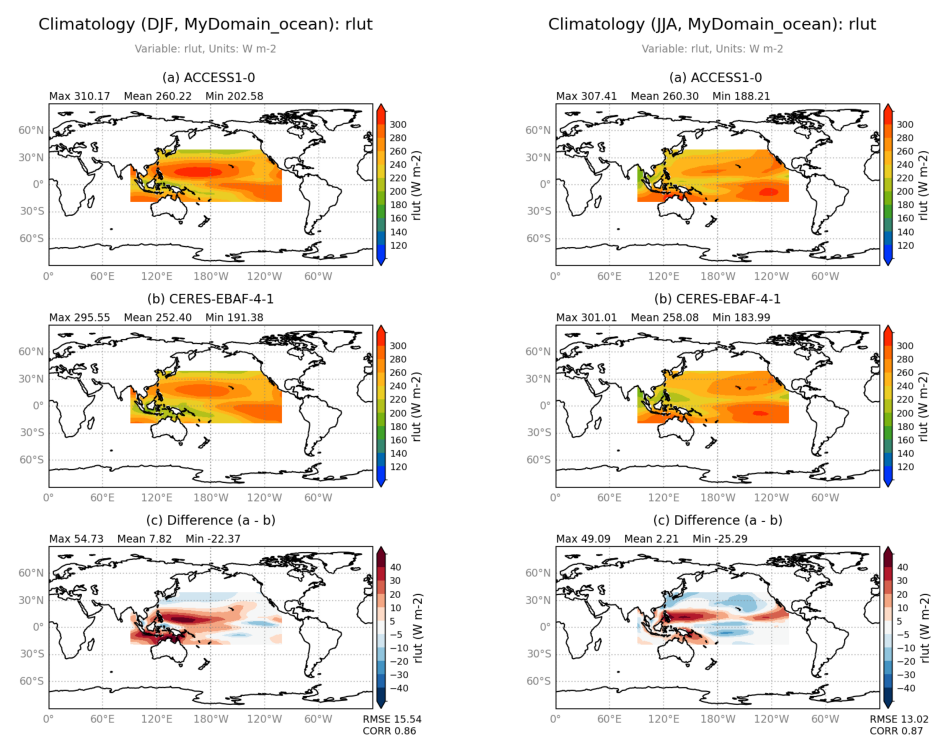

In [13]:
# path to images
image_path_djf = os.path.join(demo_output_directory,"Ex4/rlut/rlut_ACCESS1-0__interpolated_regrid2_MyDomain_ocean_DJF_Ex4.png")
image_path_jja = os.path.join(demo_output_directory,"Ex4/rlut/rlut_ACCESS1-0__interpolated_regrid2_MyDomain_ocean_JJA_Ex4.png")

# display images
fig, ax = plt.subplots(1,2); ax[0].axis('off'); ax[1].axis('off')
ax[0].imshow(mpimg.imread(image_path_djf))
ax[1].imshow(mpimg.imread(image_path_jja))

The region value `None` is another way of indicating "global"

Custom domain is controlled by the variable `regions_specs` in the parameter file or command line. For example, a custom region for Antarctica over land could be defined with `regions_specs = {'ANT': {'value': 100, 'domain': {'latitude': (-90, -60)}}}` in the parameter file. `value` indicate masking, 100: land only, 0: ocean only.

The command to use the custom region would look like `--regions '{"rlut": ["ANT"]}'` in the command line or `regions = {"rlut": ["ANT"]}` in the parameter file.

### Land/sea masks  
Land/Sea masking is required for some regions (e.g. "land"). This is controlled by variables `sftlf_filename_template` and `generate_sftlf`. The metrics package expects the land/sea mask files to be located with the model data under a fixed field variable ('fx') with a file name that follows the pattern in `sftlf_filename_template`. The example data does not come with a land/sea mask, so we set `generate_sftlf` to `True` in the basic parameter file to have the PMP generate a land/sea mask where 0 represents ocean and 100 represents land.

### Extract vertical level  and customize observations
This example shows how to extract a vertical level from a 4-D variable. The 500 hPa level of zg is specified by adding "\_500" to zg.  

There are several sets of observations available in the standard PCMDI set. This case uses the 'alternate1' observations for zg with the flag `reference_data_set`. The test and observations path are specified with `test_data_path` and `reference_data_path`, respectively.

To see which datasets are the default and which are alternates, check out [pcmdi_metrics/doc/obs_info_dictionary.json](https://github.com/PCMDI/pcmdi_metrics/blob/main/doc/obs_info_dictionary.json).

In [14]:
%%bash
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex5' \
--vars 'zg_500' \
--test_data_set 'CanCM4' \
--reference_data_set "alternate1"

--- prepare mean climate metrics calculation ---
case_id: Ex5
test_data_set: ['CanCM4']
realization: 
vars: ['zg_500']
varname_in_test_data: None
reference_data_set: ['alternate1']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: False
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'value':

2024-10-23 20:47:04,554 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:47:04,554 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: m
load and regrid done
region: global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 43.136407421218316
metrics, stdObs_xyt
metrics, stdObs_xyt: 266.7884899432676
metrics, std_xyt
metrics, std_xyt: 289.17169839153274
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -26.728290236301323
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 27.30732894422076
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  36.86694958124509 25.392330977484043
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9982653843741294
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metri

INFO::2024-10-23 20:47::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:47:43,691 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:47:43,691 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: NHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 52.2064859576494
metrics, stdObs_xyt
metrics, stdObs_xyt: 217.77101191168182
metrics, std_xyt
metrics, std_xyt: 243.07923995935116
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -33.98470249136269
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 36.125120682823166
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  43.400849746947806 26.993957755962263
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9934603819353881
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE

INFO::2024-10-23 20:48::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:48:22,182 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:48:22,182 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: SHEX
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 61.71843893264793
metrics, stdObs_xyt
metrics, stdObs_xyt: 283.2198853808546
metrics, std_xyt
metrics, std_xyt: 296.6174198809844
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -53.00981685915384
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 53.00981685915384
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  56.89534707654409 20.66494218524041
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9981091437507361
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCULATE ANN

INFO::2024-10-23 20:49::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:49:08,486 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:49:08,486 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json


region: TROPICS
spatial subset done
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  zg
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 14.846540399655922
metrics, stdObs_xyt
metrics, stdObs_xyt: 28.365941345001204
metrics, std_xyt
metrics, std_xyt: 34.43200609661541
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -9.959320797344981
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 10.047189117453625
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  12.569280170055691 7.668033206040149
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9610677207049356
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metrics-CALCUL

INFO::2024-10-23 20:49::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:49:45,193 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
2024-10-23 20:49:45,193 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500/zg_500_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex5.json
INFO::2024-10-23 20:49::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex5/zg_500_2.5x2.5_regrid2

pmp mean clim driver completed


There are a couple of steps for using an observational dataset that isn't included in **obs_info_dict.json**. The observational dataset mush be documented in a catalog json following the format used in **obs_info_dict.json**. Then set the variable `custom_observations` to the path for this catalog. The observation files need to be located under the path specified by `reference_data_path`

### Adding notes and other options  
This example adds a field to "user_notes" in the output json and saves the interpolated fields. Interpolated fields are saved at the same directory level as the parameter file.

In [15]:
%%bash 
mean_climate_driver.py -p basic_param.py \
--case_id 'Ex6' --user_notes 'Example note' --save_test_clims True

--- prepare mean climate metrics calculation ---
case_id: Ex6
test_data_set: ['ACCESS1-0', 'CanCM4']
realization: 
vars: ['rlut']
varname_in_test_data: None
reference_data_set: ['all']
target_grid: 2.5x2.5
regrid_tool: regrid2
regrid_tool_ocn: esmf
save_test_clims: True
test_clims_interpolated_output: None
filename_template: cmip5.historical.%(model_version).r1i1p1.mon.%(variable).198101-200512.AC.v20200426.nc
sftlf_filename_template: sftlf_%(model_version).nc
generate_sftlf: True
regions_specs: {'global': {}, 'NHEX': {'domain': {'latitude': (30.0, 90)}}, 'SHEX': {'domain': {'latitude': (-90.0, -30)}}, 'TROPICS': {'domain': {'latitude': (-30.0, 30)}}, '90S50S': {'domain': {'latitude': (-90.0, -50)}}, '50S20S': {'domain': {'latitude': (-50.0, -20)}}, '20S20N': {'domain': {'latitude': (-20.0, 20)}}, '20N50N': {'domain': {'latitude': (20.0, 50)}}, '50N90N': {'domain': {'latitude': (50.0, 90)}}, 'CONUS': {'domain': {'latitude': (24.7, 49.4), 'longitude': (-124.78, -66.92)}}, 'land': {'valu

2024-10-23 20:50:00,578 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:50:00,578 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.443886637144088
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1384446642039474
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.770267763900403
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.04383979899538 7.962870239960437
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9693832697582581
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
metr

INFO::2024-10-23 20:50::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex6.json
2024-10-23 20:50:35,103 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex6.json
2024-10-23 20:50:35,103 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_alternate1_Ex6.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:50:35,368 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:50:35,368 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.581863266319667
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.47036113512534
metrics, std_xyt
metrics, std_xyt: 35.676970161763705
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.1635460184347601
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.33676419779921
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.611035481689909 9.540344002879925
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9518562007048922
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2024-10-23 20:51::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex6.json
2024-10-23 20:51:17,721 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex6.json
2024-10-23 20:51:17,721 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_alternate1_Ex6.json


ref: default
ref_data_full_path: demo_data_tmp/obs4MIPs_PCMDI_clims/rlut/CERES-EBAF-4-1/v20210804/rlut_mon_CERES-EBAF-4-1_PCMDI_gn.200301-201812.AC.v20210804.nc
ref_data load_and_regrid failed: int() argument must be a string, a bytes-like object or a real number, not 'NoneType' 
Re-try with decode_times=False
'DataArray' object has no attribute 'units'
units: 
ref_data load_and_regrid done
model, runs, find_all_realizations: ACCESS1-0 [''] False
-----------------------
model, run: ACCESS1-0 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.ACCESS1-0.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:51:21,321 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:51:21,321 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 11.441474434051779
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.42022623440726
metrics, std_xyt
metrics, std_xyt: 36.4380172334105
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: 1.1365873707975822
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 5.76358422001215
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  8.032983607315776 7.9521691873316795
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9694779269200444
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
met

INFO::2024-10-23 20:52::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json
2024-10-23 20:52:05,876 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json
2024-10-23 20:52:05,876 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_ACCESS1-0__2.5x2.5_regrid2_metrics_default_Ex6.json


model, runs, find_all_realizations: CanCM4 [''] False
-----------------------
model, run: CanCM4 
test_data (model in this case) full_path: demo_data_tmp/CMIP5_demo_clims/cmip5.historical.CanCM4.r1i1p1.mon.rlut.198101-200512.AC.v20200426.nc


2024-10-23 20:52:06,167 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.
2024-10-23 20:52:06,167 [WARNING]: dataset.py(_is_decodable:549) >> 'time' does not have a 'units' attribute set so it could not be decoded. Try setting the 'units' attribute (`ds.{coords.name}.attrs['units']`) and try decoding again.


units: W m-2
load and regrid done
region: Global
plot map done
plot map done
plot map done
plot map done
plot map done
compute metrics start
var:  rlut
metrics-CALCULATE ANNUAL CYCLE SPACE-TIME RMS, CORRELATIONS and STD
metrics, rms_xyt
metrics, rms_xyt: 12.592931277171877
metrics, stdObs_xyt
metrics, stdObs_xyt: 33.42022623440726
metrics, std_xyt
metrics, std_xyt: 35.676970161763705
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL MEAN BIAS
metrics-CALCULATE ANNUAL MEAN BIAS, bias_xy: -1.165403311841126
metrics-CALCULATE MSE
metrics-CALCULATE MSE, mae_xy: 6.339387410014902
metrics-CALCULATE MEAN RMS
metrics-CALCULATE MEAN RMS: rms_xy, rmsc_xy:  9.609441449405928 9.538511418995654
metrics-CALCULATE MEAN CORR
metrics-CALCULATE MEAN CORR: cor_xy: 0.9518750636449926
metrics-CALCULATE ANNUAL OBS AND MOD STD
metrics-CALCULATE ANNUAL OBS AND MOD MEAN
metrics-CALCULATE ANNUAL MEANS
metrics-CALCULATE ANNUAL AND ZONAL MEAN RMS
metrics-CALCULATE ANNUAL MEAN DEVIATION FROM ZONAL MEAN RMS
m

INFO::2024-10-23 20:53::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
2024-10-23 20:53:03,750 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
2024-10-23 20:53:03,750 [INFO]: base.py(write:422) >> Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut/rlut_CanCM4__2.5x2.5_regrid2_metrics_default_Ex6.json
INFO::2024-10-23 20:53::pcmdi_metrics:: Results saved to a json file: /Users/lee1043/Documents/Research/git/pcmdi_metrics_20230620_pcmdi/pcmdi_metrics/doc/jupyter/Demo/demo_output_tmp/Ex6/rlut_2.5x2.5_regrid2_metrics_Ex6.json
2024-

pmp mean clim driver completed


Some other flags to note:  
`--ext` '.nc' or '.xml'. NetCDF files should be post-processed annual climatologies  
`--filename_template` Based on the format of your model files.  
    - When the file name varies based on model, experiment, or another parameter, use %(parameter) as a placeholder   
    (for example, "CMIP5.historical.%(model_version)..." in this demo's parameter file)  
`--help` or `-h` Help command for more information about all flags.